In [1]:
import torch
import torchvision
import pandas as pd
import torch.nn as nn
from torch.utils.data import  DataLoader, Dataset
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from scipy.io import loadmat
torch.manual_seed(1)
scaler = preprocessing.StandardScaler()
plt.style.use('seaborn')

In [2]:
df_recovered = pd.read_csv('C:\\Users\\Fahad\OneDrive - stud.uni-saarland.de\\DS project\\Dataset\\time_series_covid19_recovered_global.csv') 
df_deaths  =  pd.read_csv('C:\\Users\\Fahad\OneDrive - stud.uni-saarland.de\\DS project\\Dataset\\time_series_covid19_deaths_global.csv')
df_confirmed = pd.read_csv('C:\\Users\\Fahad\OneDrive - stud.uni-saarland.de\\DS project\\Dataset\\time_series_covid19_confirmed_global.csv')

In [3]:
df_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1762,1830,1875,2171,2651,3013,3326,3928,4201,4725
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,910,925,938,945,960,980,1001,1034,1039,1044
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,6453,6631,6717,6799,6951,7074,7255,7322,7420,7606
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,741,741,744,751,757,759,780,781,781,781
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,21,24,24,38,38,40,41,42,61,61


In [4]:
df_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,309,327,357,369,384,405,426,446,451,471
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,33,34,34,34,34,34,35,36,36,36
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,690,698,707,715,724,732,741,751,760,767
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,4,4,4,4,4,5,5,6,6


In [5]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,852,852,852,852,852,852,852,853,853,853
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,86,88,91,92,96,113,118,130,138,140


In [6]:
#df_confirmed[df_confirmed.columns[4:148]]
#table = pd.pivot_table(data= df_confirmed, index = 'Country/Region', columns= df_confirmed[df_confirmed.columns[4:148]])
DataWithDates = df_confirmed[df_confirmed.columns[4:148] ]

countries = np.array(df_confirmed[df_confirmed.columns[1] ])
print(countries)

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Australia'
 'Australia' 'Australia' 'Australia' 'Australia' 'Australia' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Cabo Verde' 'Cambodia'
 'Cameroon' 'Canada' 'Canada' 'Canada' 'Canada' 'Canada' 'Canada' 'Canada'
 'Canada' 'Canada' 'Canada' 'Canada' 'Central African Republic' 'Chad'
 'Chile' 'China' 'China' 'China' 'China' 'China' 'China' 'China' 'China'
 'China' 'China' 'China' 'China' 'China' 'China' 'China' 'China' 'China'
 'China' 'China' 'China' 'China' 'China' 'China' 'China' 'China' 'China'
 'China' 'China' 'China' 'China' 'China' 'China' 'China' 'Colombia'
 'Congo (Brazzaville)' 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Diamond Princess' 'Cuba' 'Cyprus' 'Czechia' 'Denmark'
 'Denmark' 'Denmark' 'Dj

In [7]:
DataWithDates

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20
0,0,0,0,0,0,0,0,0,0,0,...,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102
1,0,0,0,0,0,0,0,0,0,0,...,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464
2,0,0,0,0,0,0,0,0,0,0,...,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810
3,0,0,0,0,0,0,0,0,0,0,...,852,852,852,852,852,852,852,852,853,853
4,0,0,0,0,0,0,0,0,0,0,...,86,86,88,91,92,96,113,118,130,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0,0,0,0,0,0,0,0,0,0,...,485,499,499,513,513,514,611,632,639,659
262,0,0,0,0,0,0,0,0,0,0,...,453,469,482,484,496,524,560,591,632,705
263,0,0,0,0,0,0,0,0,0,0,...,132,132,141,141,141,141,162,162,163,176
264,0,0,0,0,0,0,0,0,0,0,...,4289,4370,4453,4529,4609,4690,4763,4834,4902,4971


In [42]:
china = df_confirmed.loc[df_confirmed['Country/Region'] == 'China']
china

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20
49,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,991,991,991,991,991,991,991,991,991,991
50,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,594,594,594,594,594,594,595,601,637,673
51,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,579,579,579,579,579,579,579,579,580,582
52,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,...,358,359,359,359,359,360,361,361,361,362
53,Gansu,China,37.8099,101.0583,0,2,2,4,7,14,...,139,139,139,139,139,139,139,139,139,139
54,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,...,1601,1602,1602,1604,1604,1607,1607,1608,1625,1625
55,Guangxi,China,23.8298,108.7881,2,5,23,23,36,46,...,254,254,254,254,254,254,254,254,254,254
56,Guizhou,China,26.8154,106.8748,1,3,3,4,5,7,...,147,147,147,147,147,147,147,147,147,147
57,Hainan,China,19.1959,109.7453,4,5,8,19,22,33,...,169,170,170,170,170,170,170,171,171,171
58,Hebei,China,39.5490,116.1306,1,1,2,8,13,18,...,328,328,328,328,328,328,328,328,328,331


<function matplotlib.pyplot.show(*args, **kw)>

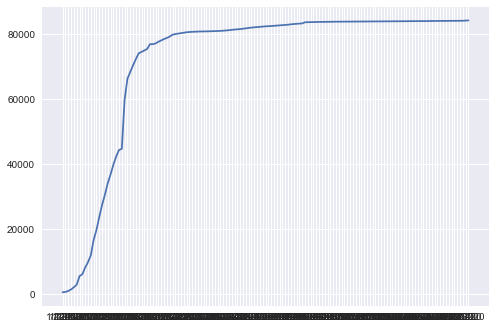

In [55]:
col_list= list(china)

col_list.remove('Province/State')
col_list.remove('Country/Region')
col_list.remove('Lat')
col_list.remove('Long')
#col_list
rowsum = china[col_list].sum()
plt.plot(rowsum)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

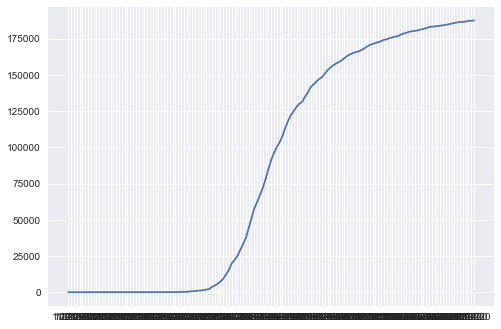

In [73]:
germany = df_confirmed.loc[df_confirmed['Country/Region'] == 'Germany']
col_list= list(germany)
col_list.remove('Province/State')
col_list.remove('Country/Region')
col_list.remove('Lat')
col_list.remove('Long')
#col_list
rowsumg = germany[col_list].sum()
plt.plot(rowsumg)
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

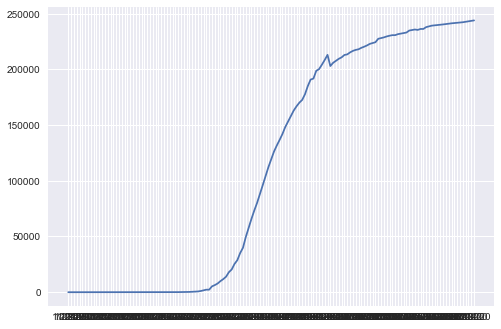

In [76]:
spain = df_confirmed.loc[df_confirmed['Country/Region'] == 'Spain']
col_list= list(spain)
col_list.remove('Province/State')
col_list.remove('Country/Region')
col_list.remove('Lat')
col_list.remove('Long')
#col_list
rowsums = spain[col_list].sum()
plt.plot(rowsums)
plt.show

In [15]:
plt.bar(size(Dataset),DataWithDates)
plt.xticks(rotation=70) 

#x-axis labels 
plt.xlabel('countries') 

#y-axis labels 
plt.ylabel('Number of Cases') 

#plot title 
plt.title('Confirmed Cases') 


#display 
plt.show();

NameError: name 'size' is not defined